In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile


2021-08-13 22:25:47.721973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-13 22:25:47.722001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<div class="list-group">
    
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style="background-color:green; color:white">STEPS</h3>
    
  <a href="#super" style="background-color:tan; color:black"  class="list-group-item list-group-item-action">Extract the Zip File</a>
    
  <a href="#path" style="background-color:olive; color:black" class="list-group-item list-group-item-action">Indicate the Path</a>
    
  <a href="#train" style="background-color:darkcyan; color:black" class="list-group-item list-group-item-action">Visualize Training Images</a>
    
  <a href="#MDOEL" style="background-color:skyblue; color:black" class="list-group-item list-group-item-action disabled">Create Model</a>

 <a href="#pred" style="background-color:royalblue; color:black" class="list-group-item list-group-item-action disabled">Predict</a>

 <a href="#cm" style="background-color:gold; color:black" class="list-group-item list-group-item-action">Confusion Matrix</a>
 
  <a href="#fine" style="background-color:seagreen; color:black"  class="list-group-item list-group-item-action">Fine Tune</a>

 <a href="#after" style="background-color:pink; color:black" class="list-group-item list-group-item-action">Predict After Tuning</a>
 
 <a href="#SON" style="background-color:darkviolet; color:black" class="list-group-item list-group-item-action disabled">RESULT</a>

 </div>

 

**Unzip file with using the kaggle path.**

<a id ="super"></a> 
<div class="alert alert-warning" role="alert"> <font size=5
 <b>  Extract the Zip File </b> </font>
</div>


In [5]:
test1= zipfile.ZipFile('../input/dogs-vs-cats/test1.zip')
test1.extractall()

In [6]:
train= zipfile.ZipFile('../input/dogs-vs-cats/train.zip')
train.extractall()

In [75]:
import pathlib

path = pathlib.Path("./dogs-vs-cats/train")
new_dir = pathlib.Path("./dogs-vs-cats/train_validation")

def seperating(path, new_dir, subset_name, start, end):
    category = ["cat","dog"]
    for k in category:
        dir = new_dir / subset_name / k
        try:
            os.makedirs(dir)
        except OSError:
            print(f"This file {dir} exist.")

        fnames = [f"{k}.{i}.jpg" for i in range(start, end)]
        for fname in fnames:
            shutil.copyfile(src=path / fname,
                            dst=dir / fname)

seperating(path, new_dir, "validation", start=0, end=200)
seperating(path, new_dir, "train", start=201, end=701)
seperating(path, new_dir, "test", start=800, end=900)


This file dogs-vs-cats/train_validation/validation/cat exist.
This file dogs-vs-cats/train_validation/validation/dog exist.
This file dogs-vs-cats/train_validation/train/cat exist.
This file dogs-vs-cats/train_validation/train/dog exist.
This file dogs-vs-cats/train_validation/test/cat exist.
This file dogs-vs-cats/train_validation/test/dog exist.


**So we have validation, train and test sets.**

<a id ="path"></a> 
<div class="alert alert-warning" role="alert">
 <font size=15 <b>  Indicate the Path </b> </font> </div>


In [8]:
# **Paths:**

pth_validation = "./dogs-vs-cats/train_validation/validation"
pth_train = "./dogs-vs-cats/train_validation/train"
pth_test = "./dogs-vs-cats/train_validation/test"


path, dirs, files = next(os.walk(pth_test))
#print(len(files))
print(dirs)


['cat', 'dog']


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_btch = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=pth_train, target_size=(224,224), classes = ["cat","dog"], batch_size=10)

test_btch = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=pth_test, target_size=(224,224), classes = ["cat","dog"], batch_size=10, shuffle=False)

validation_btch = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=pth_validation, target_size=(224,224), classes = ["cat","dog"], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
img, label = next(train_btch)

<a id ="train"></a> 
<div class="alert alert-warning" role="alert">
 <font size=15 <b>  Visualize Training Images </b> </font> </div>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

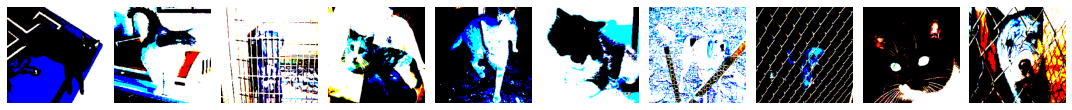

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [12]:
# https://www.tensorflow.org/tutorials/images/classification#visualize_training_images

def plotImg(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImg(img)
print(label)    

<a id ="MDOEL"></a> 
<div class="alert alert-warning" role="alert">
 <font size=15 <b>  Create Model </b> </font> </div>


In [13]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

inputs = keras.Input(shape=(224, 224, 3))

data = Rescaling(1./255)(inputs)
# chose relu, it is also most common, 
# 'cause  and if the input value (x) is negative, then a value 0.0 is returned, otherwise, the value is returned.

data = layers.Conv2D(filters=32, kernel_size=(3,3) ,activation="relu")(data)
data = layers.MaxPooling2D(pool_size=2, strides=2)(data)
data = layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(data)
data = layers.MaxPooling2D(pool_size=2, strides=2)(data)
data = layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu")(data)
data = layers.MaxPooling2D(pool_size=2, strides=2)(data)
data = layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu")(data)
data = layers.MaxPooling2D(pool_size=2, strides=2)(data)
data = layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu")(data)
data = layers.Flatten()(data)

# sigmoid is okay for Binary Classification and Multilabel Classification

output = layers.Dense(2, activation="softmax")(data)


model = keras.Model(inputs=inputs, outputs=output)

2021-08-10 19:07:27.337794: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-10 19:07:27.376853: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-10 19:07:27.376893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yuqi-Yoga-Slim-7-14ARE05): /proc/driver/nvidia/version does not exist
2021-08-10 19:07:27.377455: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856 

In [14]:
from tensorflow.keras import optimizers

model.compile(loss="categorical_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["accuracy"])

# with sigmoid we can use binary; with softmax we can also use categorical. same result that we will take.

/home/yuqi/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Short note: 

Why 224 224 : 
VGG-16 Network Architecture. Output channels have shrinking dimensions (h x w). [Source: https://bit.ly/36tOKUC]

VGGNET is succesful with max pooling. Pooling is for changing the dimesions. LeNet was successful with average pooling etc. 
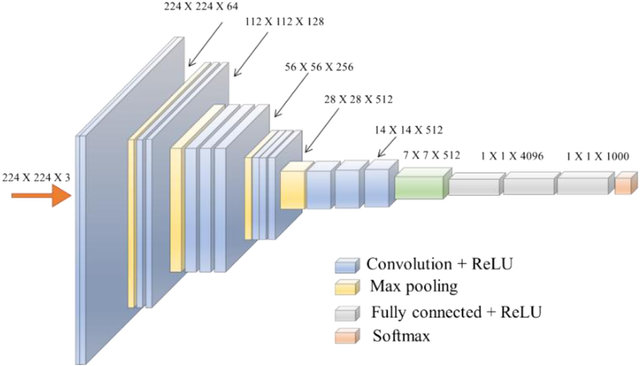

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist = model.fit(
    train_btch,
    epochs=20,
    validation_data=validation_btch,
    callbacks=callbacks,
    verbose=2)

2021-08-10 19:07:42.367859: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-10 19:07:42.387037: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1796640000 Hz


Epoch 1/20
100/100 - 33s - loss: 0.6889 - accuracy: 0.5250 - val_loss: 0.6813 - val_accuracy: 0.5375
Epoch 2/20
100/100 - 32s - loss: 0.6546 - accuracy: 0.6090 - val_loss: 0.6569 - val_accuracy: 0.6075
Epoch 3/20
100/100 - 34s - loss: 0.6211 - accuracy: 0.6400 - val_loss: 0.6560 - val_accuracy: 0.6100
Epoch 4/20
100/100 - 33s - loss: 0.5806 - accuracy: 0.6910 - val_loss: 0.6091 - val_accuracy: 0.6525
Epoch 5/20
100/100 - 34s - loss: 0.5484 - accuracy: 0.7140 - val_loss: 0.6123 - val_accuracy: 0.6425
Epoch 6/20
100/100 - 34s - loss: 0.5151 - accuracy: 0.7440 - val_loss: 0.5980 - val_accuracy: 0.6925
Epoch 7/20
100/100 - 34s - loss: 0.4885 - accuracy: 0.7570 - val_loss: 0.6096 - val_accuracy: 0.7000
Epoch 8/20
100/100 - 34s - loss: 0.4683 - accuracy: 0.7710 - val_loss: 0.6006 - val_accuracy: 0.6700
Epoch 9/20
100/100 - 34s - loss: 0.4354 - accuracy: 0.7980 - val_loss: 0.6283 - val_accuracy: 0.6750
Epoch 10/20
100/100 - 33s - loss: 0.4095 - accuracy: 0.8210 - val_loss: 0.7086 - val_accura

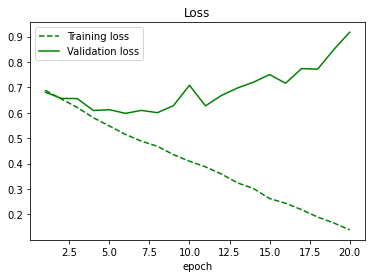

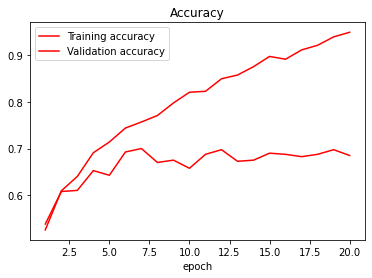

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]


epoch = range(1, len(acc) + 1)


plt.plot(epoch, loss, "--g", label="Training loss")
plt.plot(epoch, val_loss, "g", label="Validation loss")
plt.title("Loss")
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.plot(epoch, acc, "-r", label="Training accuracy")
plt.plot(epoch, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel("epoch")

plt.legend()
plt.figure()

plt.show()

OK, there is overfitting. But we will fix it, later :) . 

<a id ="pred"></a> 
<div class="alert alert-danger" role="alert">
 <font size=15 <b>  Predict </b> </font> </div>



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

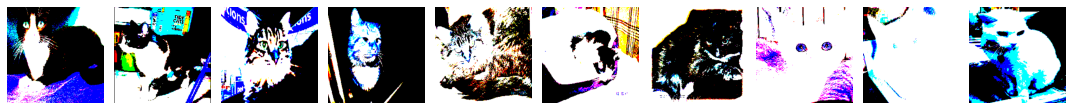

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [17]:
test_img, test_label = next(test_btch)
plotImg(test_img)
print(test_label)

In [18]:
test_btch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
predictions= model.predict(x=test_btch,verbose=0)

In [20]:
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

<a id ="cm"></a> 

<div class="alert alert-warning" role="alert">
 <font size=15 <b>  CONFUSION MATRIX </b> </font> 
</div>


In [21]:
cm = confusion_matrix(y_true=test_btch.classes, y_pred=np.argmax(predictions,axis=-1))

# Argmax is most commonly used in machine learning for finding
# the class with the largest predicted probability. 
# [https://machinelearningmastery.com/argmax-in-machine-learning/]

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# [https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html]

In [23]:
test_btch.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[64 36]
 [26 74]]


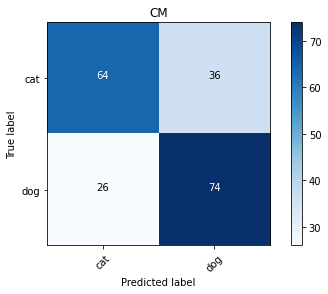

In [24]:
cm_labels = ["cat","dog"]
plot_confusion_matrix(cm=cm,classes = cm_labels, title = "CM")

64+69 = 133


31+36 = 67 

<a id ="fine"></a> 

<div class="alert alert-danger" role="alert">
<font size=15 <b>  FINE-TUNING </b> </font>  
</div>


In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 106s 0us/step


In [27]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
from keras.models import Model

model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(2, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:

model.compile(loss="categorical_crossentropy",optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=["accuracy"])

/home/yuqi/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Add early stopping callback

In [34]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 1,verbose = 1)

In [35]:
model.fit(x=train_btch,validation_data=validation_btch, epochs=5, verbose=2, callbacks=earlystop)

Epoch 1/5
100/100 - 86s - loss: 0.0028 - accuracy: 0.9980 - val_loss: 0.1327 - val_accuracy: 0.9750
Epoch 2/5
100/100 - 99s - loss: 1.4786e-04 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 0.9800
Epoch 3/5
100/100 - 107s - loss: 2.7101e-04 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9750
Epoch 4/5
100/100 - 107s - loss: 1.5914e-05 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy: 0.9750
Epoch 00004: early stopping


<a id ="after"></a> 

<div class="alert alert-success" role="alert">
  <font size=15 <b>  PREDICT AFTER FINE TUNING  </b> </font>  
</div>

In [36]:
predictions =model.predict(x=test_btch,verbose=0)

In [37]:
test_btch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [38]:
cm = confusion_matrix(y_true=test_btch.classes, y_pred=np.argmax(predictions,axis=-1))


In [39]:
test_btch.class_indices

{'cat': 0, 'dog': 1}

<a id ="SON"></a> 
<div class="alert alert-success" role="alert">
  <font size=15 <b>  RESULT </b> </font>  
</div>

Confusion matrix, without normalization
[[96  4]
 [ 2 98]]


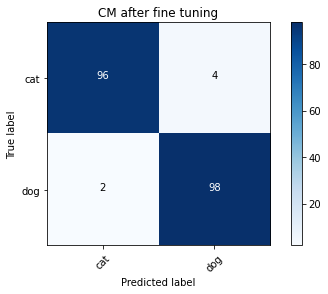

In [40]:
cm_labels = ["cat","dog"]
plot_confusion_matrix(cm=cm,classes = cm_labels, title = "CM after fine tuning")

Predict on actual test data

In [78]:
def extract_test_samples(path, new_dir, start, end):
    dir = new_dir
    try:
        os.makedirs(dir)
    except OSError:
        print(f"This file {dir} exist.")

    fnames = [f"{i}.jpg" for i in range(start, end)]
    for fname in fnames:
        shutil.copyfile(src=path / fname,
                        dst=dir / fname)

extract_test_samples(pathlib.Path("./dogs-vs-cats/test1"), pathlib.Path("./dogs-vs-cats/test"), start=1, end=10)

test1_btch = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory="./dogs-vs-cats", target_size=(224,224), batch_size=10, classes=['test'], shuffle=False)

This file dogs-vs-cats/test exist.
Found 10 images belonging to 1 classes.


In [79]:
predictions =model.predict(x=test1_btch,verbose=1)

1/1 [==============================] - 1s 892ms/step


Visualize some predictions

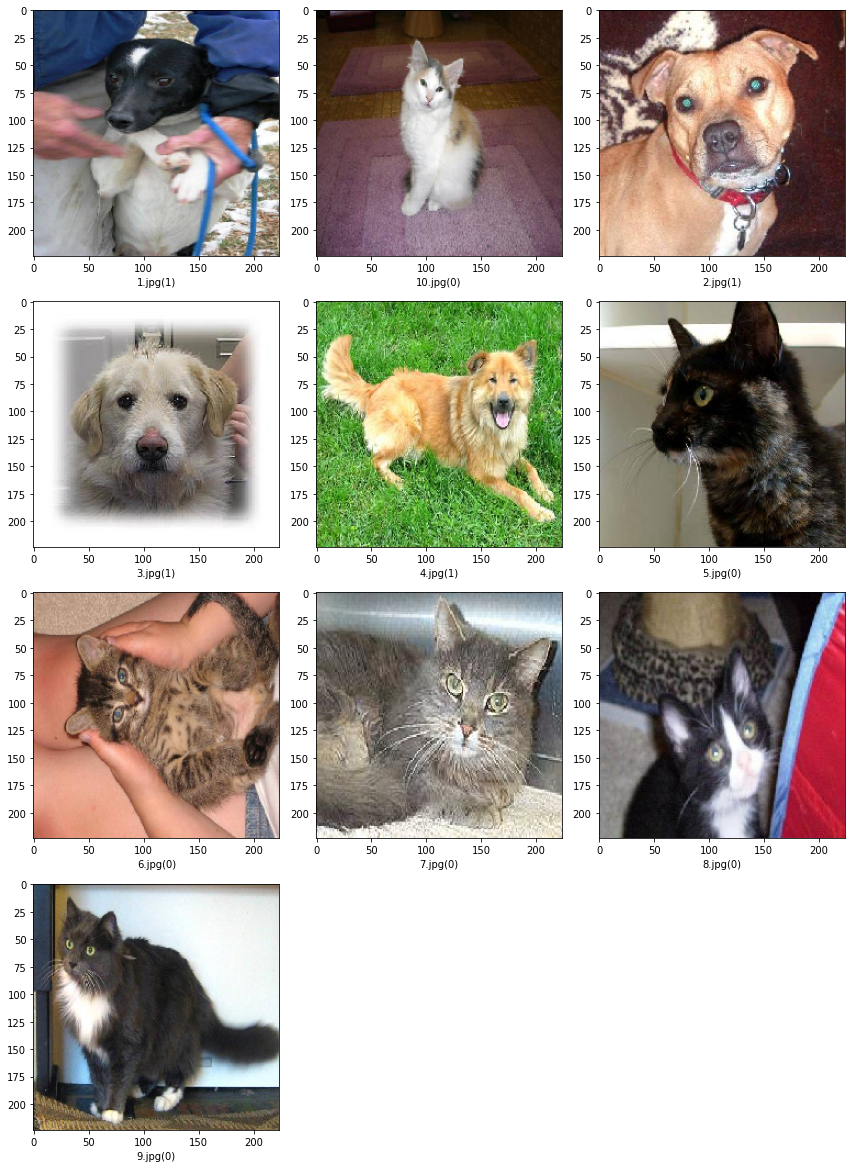

In [80]:
import pandas as pd
from keras.preprocessing.image import load_img
test_filenames = sorted(os.listdir("./dogs-vs-cats/test"))
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
test_df['category'] = np.argmax(predictions, axis=-1)

sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./dogs-vs-cats/test1/"+filename, target_size=(224,224))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

save model for custom prediction

In [81]:
model.save("cats-vs-dogs-model")

2021-08-11 15:55:58.590845: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cats-vs-dogs-model/assets
